In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import sklearn
import warnings

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import utils
import ml_functions

red_code = '\033[91m'
blue_code = '\033[94m'
green_code = '\033[92m'
yellow_code = '\033[93m'
reset_code = '\033[0m'

C:\Users\Kadem\AppData\Local\Temp\ipykernel_51516\913017747.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load the data & Préprocessing

In [2]:
path = "./datasets/movies/movies1000/"
alltxts,alllabs = utils.load_movies(path)

In [3]:
movies_df = pd.DataFrame()
movies_df['text'] = alltxts
movies_df['label'] = alllabs

In [4]:
preprocessed_alltxts = [utils.preprocess(alltxt) for alltxt in movies_df.text]

preprocessed_movies_df = pd.DataFrame()
preprocessed_movies_df['text'] = preprocessed_alltxts
preprocessed_movies_df['label'] = alllabs

preprocessed_movies_df.describe


<bound method NDFrame.describe of                                                    text  label
0     its now the anniversary of the slayings of jul...      0
1     this is the last carry on film with its almost...      0
2     i think we should as responsible citizens all ...      0
3      some houses are born bad goes the hauntings t...      0
4      return to horror high wants to be a couple di...      0
...                                                 ...    ...
1995  when i saw the trailer for this film i laughed...      1
1996  theres some movies i enjoy even though i know ...      1
1997  warning this review contains some spoilers for...      1
1998  capsule sidesplitting comedy that follows its ...      1
1999  tone alone cannot sustain a film but it can go...      1

[2000 rows x 2 columns]>

In [5]:
# Mélange des données
preprocessed_movies_df = preprocessed_movies_df.sample(frac=1, random_state=42)

preprocessed_movies_df.describe

<bound method NDFrame.describe of                                                    text  label
1860  of the major horror subgenres vampire movies a...      1
353   disconnect the phone line dont accept the char...      0
1333   dimension films scream s distributor has aske...      1
905   a suave cool collected rich uptight bad guy cl...      0
1289  note some may consider portions of the followi...      1
...                                                 ...    ...
1130  if there is one thing that bothers me about ho...      1
1294  if theres one thing in common about all of hol...      1
860   remember tom cruise and brian brown as rival b...      0
1459  note some may consider portions of the followi...      1
1126  ladies and gentlemen s independence day is her...      1

[2000 rows x 2 columns]>

In [6]:
print(len(preprocessed_movies_df['text']))
print(len(preprocessed_movies_df['label']))

2000
2000


### FONCTION D'AFFICHAGE DES METRICS

In [12]:
import matplotlib.pyplot as plt

def plot_metrics(dataframe):
    evaluation_types = dataframe['Type'].unique()
    metrics = ['Accuracy', 'F1 Score', 'AUC']

    # Création de sous-graphiques pour chaque métrique
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 8), sharex=True)

    # Parcours des métriques
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Parcours des types d'évaluation
        for eval_type in evaluation_types:
            eval_type_df = dataframe[dataframe['Type'] == eval_type]
            x = eval_type_df['Model']
            y = eval_type_df[metric]
            ax.plot(x, y, marker='o', label=eval_type)

        ax.set_ylabel(metric)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# TESTS & EVALUATION

# Régresionn logistic

In [9]:
analyze_function = ml_functions.logistic_regression_analyze
log_df = ml_functions.all_evaluations(preprocessed_movies_df, analyze_function)

Entrainement et évaluation pour Unigram
Entrainement et évaluation pour Bigram
Entrainement et évaluation pour Trigram
Entrainement et évaluation pour Unigram Stop words
Entrainement et évaluation pour Unigram + Stop word
Entrainement et évaluation pour Bigram + Stop word
Entrainement et évaluation pour Trigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Unigram
Entrainement et évaluation pour Reduction du vocabulaire Bigram
Entrainement et évaluation pour Reduction du vocabulaire Trigram
Entrainement et évaluation pour Reduction du vocabulaire Unigram Stop words
Entrainement et évaluation pour Reduction du vocabulaire Unigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Bigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Trigram + Stop word


In [14]:
log_df.describe

<bound method NDFrame.describe of                                             Type   Model  Accuracy  F1 Score  \
0                                        Unigram   Count    0.5925  0.567639   
1                                        Unigram  TF-IDF    0.6000  0.593909   
2                                         Bigram   Count    0.6825  0.616314   
3                                         Bigram  TF-IDF    0.7250  0.736842   
4                                        Trigram   Count    0.5600  0.228070   
5                                        Trigram  TF-IDF    0.7425  0.746929   
6                             Unigram Stop words   Count    0.5925  0.567639   
7                             Unigram Stop words  TF-IDF    0.6000  0.593909   
8                            Unigram + Stop word   Count    0.6150  0.446043   
9                            Unigram + Stop word  TF-IDF    0.6850  0.686567   
10                            Bigram + Stop word   Count    0.6150  0.446043   
11    

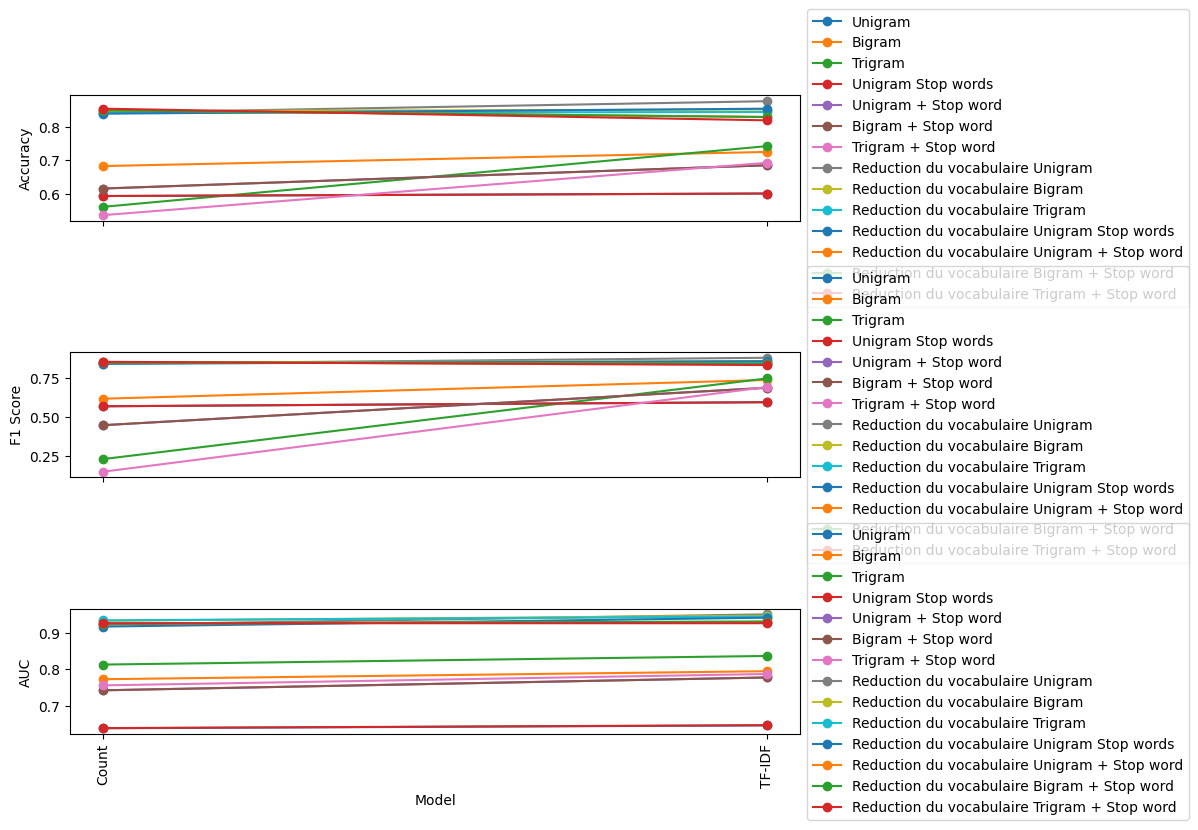

In [15]:
plot_metrics(log_df)

# SVM linéaire

In [16]:
analyze_function = ml_functions.svm_analyze
svm_df = ml_functions.all_evaluations(preprocessed_movies_df, analyze_function)

Entrainement et évaluation pour Unigram
Entrainement et évaluation pour Bigram
Entrainement et évaluation pour Trigram
Entrainement et évaluation pour Unigram Stop words
Entrainement et évaluation pour Unigram + Stop word
Entrainement et évaluation pour Bigram + Stop word
Entrainement et évaluation pour Trigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Unigram
Entrainement et évaluation pour Reduction du vocabulaire Bigram
Entrainement et évaluation pour Reduction du vocabulaire Trigram
Entrainement et évaluation pour Reduction du vocabulaire Unigram Stop words
Entrainement et évaluation pour Reduction du vocabulaire Unigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Bigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Trigram + Stop word


In [17]:
svm_df.describe

<bound method NDFrame.describe of                                             Type   Model  Accuracy  F1 Score  \
0                                        Unigram   Count    0.5525  0.281124   
1                                        Unigram  TF-IDF    0.5725  0.676749   
2                                         Bigram   Count    0.5075  0.083721   
3                                         Bigram  TF-IDF    0.5050  0.029412   
4                                        Trigram   Count    0.5050  0.029412   
5                                        Trigram  TF-IDF    0.5025  0.019704   
6                             Unigram Stop words   Count    0.5525  0.281124   
7                             Unigram Stop words  TF-IDF    0.5725  0.676749   
8                            Unigram + Stop word   Count    0.5050  0.048077   
9                            Unigram + Stop word  TF-IDF    0.5050  0.029412   
10                            Bigram + Stop word   Count    0.5050  0.048077   
11    

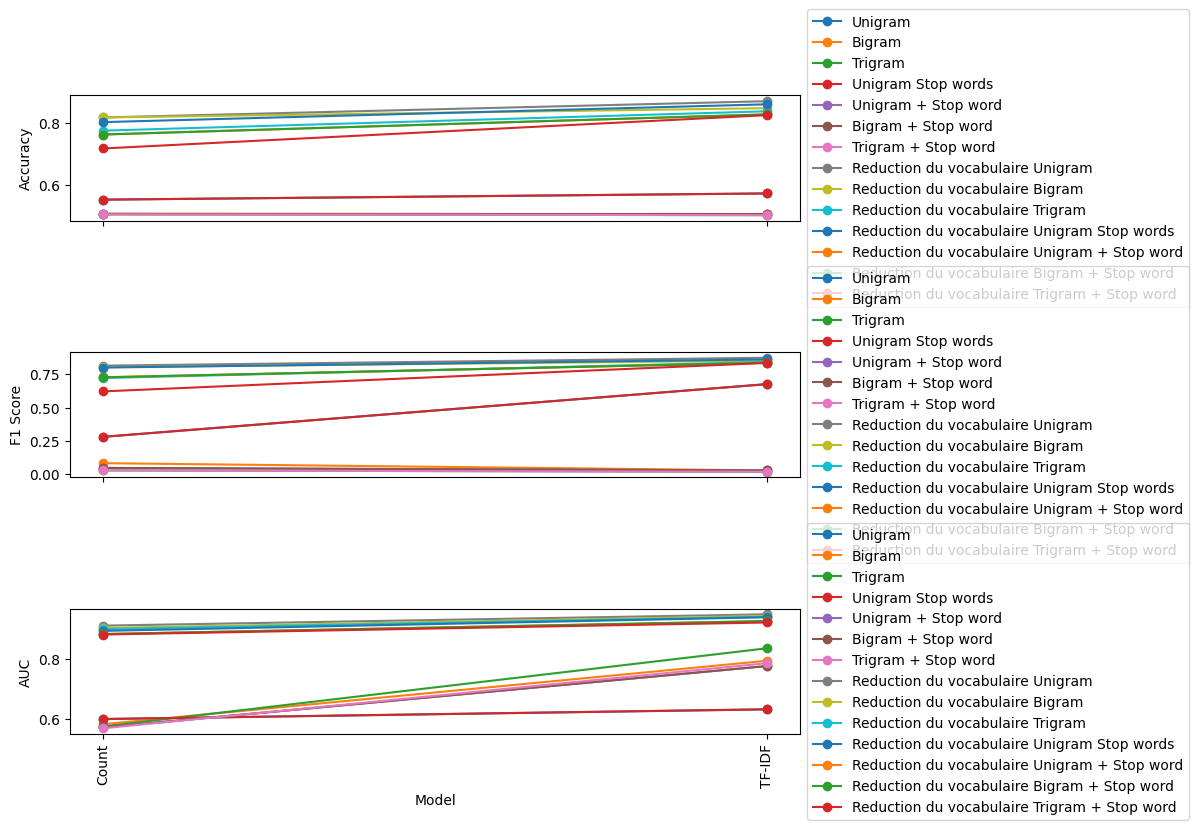

In [18]:
plot_metrics(svm_df)

# Arbres

In [22]:
analyze_function = ml_functions.decision_tree_analyze
tree_df = ml_functions.all_evaluations(preprocessed_movies_df, analyze_function)

Entrainement et évaluation pour Unigram
Entrainement et évaluation pour Bigram
Entrainement et évaluation pour Trigram
Entrainement et évaluation pour Unigram Stop words
Entrainement et évaluation pour Unigram + Stop word
Entrainement et évaluation pour Bigram + Stop word
Entrainement et évaluation pour Trigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Unigram
Entrainement et évaluation pour Reduction du vocabulaire Bigram
Entrainement et évaluation pour Reduction du vocabulaire Trigram
Entrainement et évaluation pour Reduction du vocabulaire Unigram Stop words
Entrainement et évaluation pour Reduction du vocabulaire Unigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Bigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Trigram + Stop word


In [23]:
tree_df.describe

<bound method NDFrame.describe of                                             Type   Model  Accuracy  F1 Score  \
0                                        Unigram   Count    0.5300  0.401274   
1                                        Unigram  TF-IDF    0.5475  0.394649   
2                                         Bigram   Count    0.5450  0.294574   
3                                         Bigram  TF-IDF    0.5050  0.255639   
4                                        Trigram   Count    0.5100  0.162393   
5                                        Trigram  TF-IDF    0.5075  0.124444   
6                             Unigram Stop words   Count    0.5450  0.397351   
7                             Unigram Stop words  TF-IDF    0.5625  0.414716   
8                            Unigram + Stop word   Count    0.5125  0.125561   
9                            Unigram + Stop word  TF-IDF    0.5025  0.138528   
10                            Bigram + Stop word   Count    0.5325  0.190476   
11    

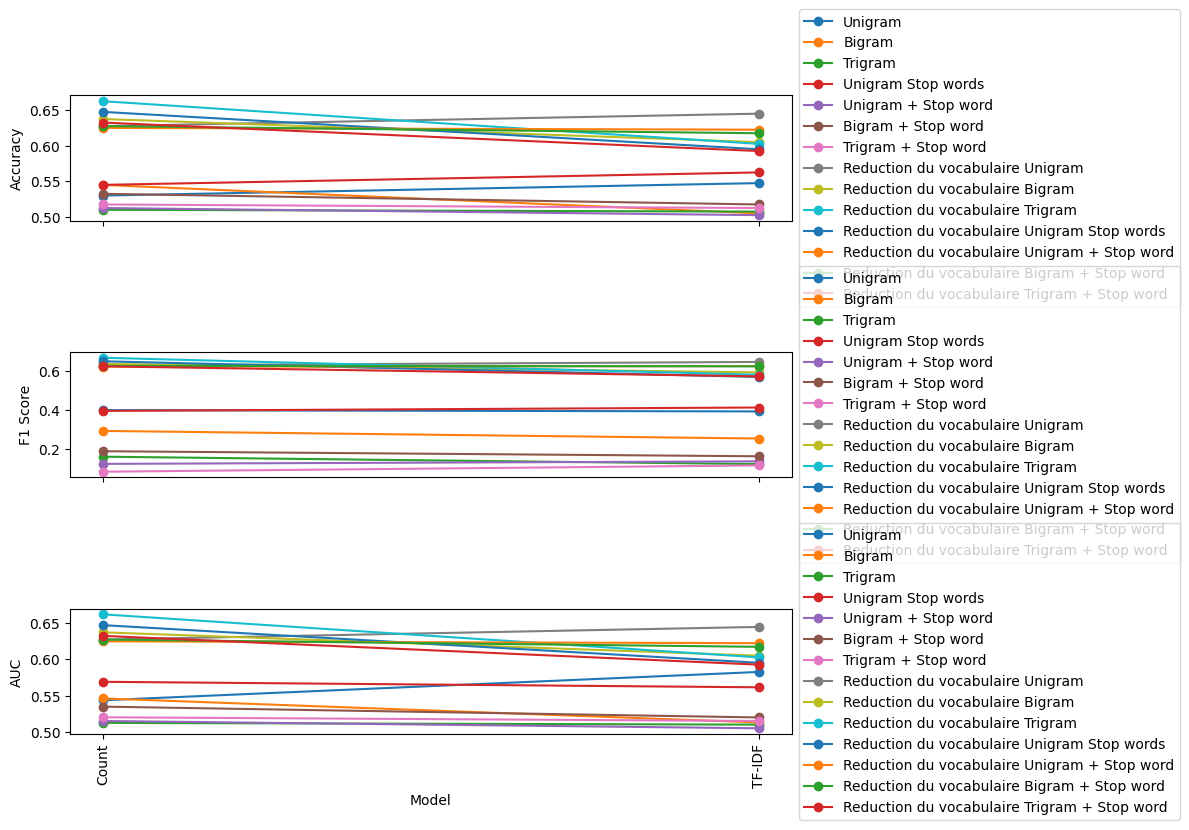

In [24]:
plot_metrics(tree_df)

# Random Forest

In [19]:
analyze_function = ml_functions.random_forest_analyze
rf_df = ml_functions.all_evaluations(preprocessed_movies_df, analyze_function)

Entrainement et évaluation pour Unigram
Entrainement et évaluation pour Bigram
Entrainement et évaluation pour Trigram
Entrainement et évaluation pour Unigram Stop words
Entrainement et évaluation pour Unigram + Stop word
Entrainement et évaluation pour Bigram + Stop word
Entrainement et évaluation pour Trigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Unigram
Entrainement et évaluation pour Reduction du vocabulaire Bigram
Entrainement et évaluation pour Reduction du vocabulaire Trigram
Entrainement et évaluation pour Reduction du vocabulaire Unigram Stop words
Entrainement et évaluation pour Reduction du vocabulaire Unigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Bigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Trigram + Stop word


In [20]:
rf_df.describe

<bound method NDFrame.describe of                                             Type   Model  Accuracy  F1 Score  \
0                                        Unigram   Count    0.5575  0.370107   
1                                        Unigram  TF-IDF    0.5675  0.401384   
2                                         Bigram   Count    0.5075  0.039024   
3                                         Bigram  TF-IDF    0.5025  0.019704   
4                                        Trigram   Count    0.5025  0.019704   
5                                        Trigram  TF-IDF    0.5025  0.019704   
6                             Unigram Stop words   Count    0.5425  0.396040   
7                             Unigram Stop words  TF-IDF    0.6025  0.488746   
8                            Unigram + Stop word   Count    0.5025  0.019704   
9                            Unigram + Stop word  TF-IDF    0.5025  0.019704   
10                            Bigram + Stop word   Count    0.5000  0.009901   
11    

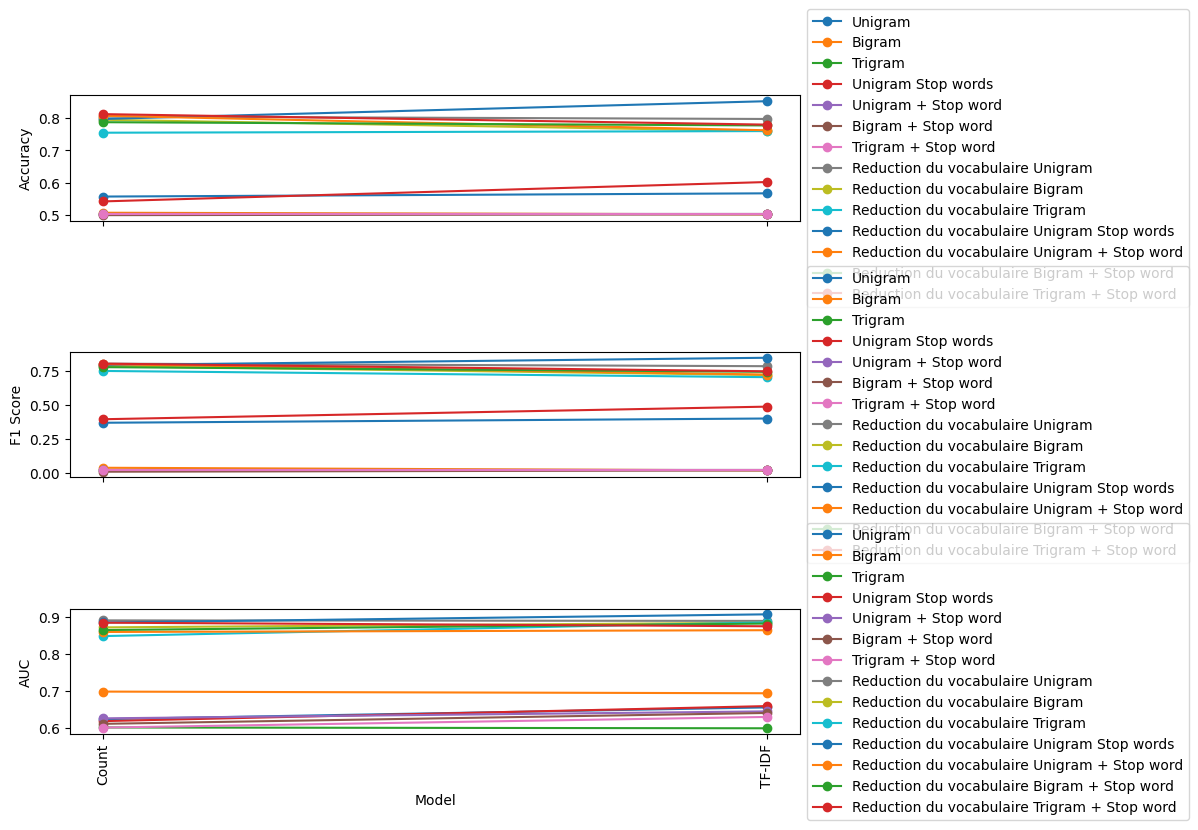

In [21]:
plot_metrics(rf_df)

# Entraînement et Evaluation avec reduction de dimension

In [ ]:
from sklearn import (
    linear_model, 
    ensemble,
    tree,
    decomposition, 
    naive_bayes, 
    neural_network,
    svm,
    metrics,
    preprocessing, 
    model_selection, 
    pipeline,
)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.decomposition import PCA

import numpy as np

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_text_train, X_text_test, y_train, y_test = model_selection.train_test_split(movies_df['text'], movies_df['label'], test_size=0.2)
#vectorizer = CountVectorizer(ngram_range=(2,2))   #Mieux  en gardant les stopwords bizzare |bigram marche VRAIMENT bien, trigram impossible a faire pas assez de memoire :c ) 
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_text_train = vectorizer.fit_transform(X_text_train)
X_text_test = vectorizer.transform(X_text_test)



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler() moins efficace que MinMaxScaler

scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_text_train.toarray())

# Apply transform to both the training set and the test set.
X_text_train = scaler.transform(X_text_train.toarray())
X_text_test = scaler.transform(X_text_test.toarray())

In [ ]:
n_c = 100
pca = PCA(.99)

X_train_pca = pca.fit_transform(X_text_train)
X_test_pca = pca.transform(X_text_test)



In [ ]:
model = clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_pca, y_train)

# Prédire les étiquettes des données de test
y_pred = model.predict(X_test_pca)

# Prédire les probabilités des classes positives pour les données de test
# Prédire les probabilités des classes positives pour les données de test
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_pca)[:, 1]
else:
    # Utiliser la décision de fonction de décision si le modèle ne prend pas en charge predict_proba
    y_prob = model.decision_function(X_test_pca)

# Calcul des métriques de performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = metrics.auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Affichage du rapport de classification
report = metrics.classification_report(y_test, y_pred)
# print(report)

print(f'{green_code}Accuracy :\t{acc}{reset_code}')
print(f'{green_code}F1 score :\t{f1}{reset_code}')
print(f'{green_code}AUC :\t\t{auc}{reset_code}')

Accuracy :	0.89
F1 score :	0.8916256157635468
AUC :		0.9558238955973899


### SVD :

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Diviser les données en ensembles d'entraînement et de test
X_text_train, X_text_test, y_train, y_test = model_selection.train_test_split(movies_df['text'], movies_df['label'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer(ngram_range=(1,2))   #Mieux  en gardant les stopwords bizzare
#vectorizer = TfidfVectorizer(stop_words="english")
X_text_train = vectorizer.fit_transform(X_text_train)
X_text_test = vectorizer.transform(X_text_test)

# Standardize the data
scaler = MinMaxScaler()
X_text_train = scaler.fit_transform(X_text_train.toarray())
X_text_test = scaler.transform(X_text_test.toarray())
print("xshape  = ", X_text_train.shape)
# Create a TruncatedSVD object and fit the data
svd = TruncatedSVD(n_components=1600)
X_svd_train = svd.fit_transform(X_text_train)
X_svd_test = svd.transform(X_text_test)



xshape  =  (1600, 457235)


In [ ]:
model = clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
# Entraîner le modèle sur les données d'entraînement
model.fit(X_svd_train, y_train)

# Prédire les étiquettes des données de test
y_pred = model.predict(X_svd_test)

# Prédire les probabilités des classes positives pour les données de test
# Prédire les probabilités des classes positives pour les données de test
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_svd_test)[:, 1]
else:
    # Utiliser la décision de fonction de décision si le modèle ne prend pas en charge predict_proba
    y_prob = model.decision_function(X_svd_test)

# Calcul des métriques de performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = metrics.auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Affichage du rapport de classification
report = metrics.classification_report(y_test, y_pred)
# print(report)

print(f'{green_code}Accuracy :\t{acc}{reset_code}')
print(f'{green_code}F1 score :\t{f1}{reset_code}')
print(f'{green_code}AUC :\t\t{auc}{reset_code}')

Accuracy :	0.9075
F1 score :	0.9053708439897699
AUC :		0.9551238780969525
